# Proyek Analisis Data: [Air Quality]
- **Nama:** [Achmad Farhan Aldyno]
- **Email:** [achmad.f.a@mail.ugm.ac.id]
- **ID Dicoding:** [achmadaldyno]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pergerakan polusi di masing-masing stasiun selama 4 tahun?
- Pertanyaan 2: Apakah faktor cuaca pada masing-masing stasiun memiliki korelasi terhadap polusi udara?
- Pertanyaan 3: Apakah ada seasonality pada tingkat polusi di masing-masing stasiun?

## Import Semua Packages/Library yang Digunakan

Importing all libraries used

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os
from scipy.stats import linregress

## Data Wrangling

### Gathering Data

Load all data by iteration

In [2]:
# Set the directory containing the CSV files
directory = "Dataset/"

# Initialize an empty dictionary to store DataFrames
dfs = {}

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract the city name from the filename
        district = filename.split("_")[2]
        district = district.split(".")[0]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        dfs[district] = df

Creating specific df for each station 

In [3]:
Aoti_df = dfs['Aotizhongxin']
Chan_df = dfs['Changping']
Ding_df = dfs['Dingling']
Dong_df = dfs['Dongsi']
Guan_df = dfs['Guanyuan']
Guch_df = dfs['Gucheng']
Huai_df = dfs['Huairou']
Nong_df = dfs['Nongzhanguan']
Shun_df = dfs['Shunyi']
Tian_df = dfs['Tiantan']
Wanli_df = dfs['Wanliu']
Wansh_df = dfs['Wanshouxigong']

Sample check new station df if all data is inputted correctly

In [169]:
Aoti_df.head() #Check head

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [5]:
Chan_df.tail()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   28.0  47.0  4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0  3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0  5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0  3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0  6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Changping  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Changping  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Changping  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Changping  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Changping

In [6]:
type(Aoti_df) #Check type

pandas.core.frame.DataFrame

Combining each DF to one DF for easier manipulation

In [7]:
#Combine dataframe for easier data assessment
combined_df = pd.concat(dfs.values(), ignore_index=True)

In [8]:
combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

### Assessing Data

#### Unit and meaning of each column/variable

| No  | year | month | day | hour | PM2.5 | PM10 | SO2 | NO2 | CO | O3 | TEMP | PRES | DEWP | RAIN | wd | WSPM | station |
| --- | ---- | ----- | --- | ---- | ----- | ---- | --- | --- | -- | -- | ---- | ---- | ---- | ---- | -- | ---- | ------- |
|     |      |       |     |      | (ug/m^3) | (ug/m^3) | (ug/m^3) | (ug/m^3) | (ug/m^3) | (ug/m^3) | (°C) | (hPa) | (°C) | (mm) |     | (m/s) |         |
| Row number for each station | Year of data | Month of data | Day of data | Hour of data | PM2.5 concentration | PM10 concentration | SO2 concentration | NO2 concentration | CO concentration | O3 concentration | Temperature | Pressure | Dew point temperature | Precipitation | Wind direction | Wind speed | Name of the air-quality monitoring site |

#### Percentage of missing and duplicated values for each column for each station:

Search missing and duplicated values in combined_df

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [77]:
combined_df.isnull().sum()

No               0
date             0
year             0
month            0
day              0
hour             0
PM2.5         8739
PM10          6449
SO2           9021
NO2          12116
CO           20701
O3           13277
TEMP           398
PRES           393
DEWP           403
RAIN           390
wd            1822
WSPM           318
station          0
date_only        0
dtype: int64

In [78]:
combined_df.duplicated().sum()

0

In [10]:
# Calculate the percentage of missing values for each column separately for each station
missing_percentage_station = combined_df.groupby('station').agg(lambda x: x.isna().mean() * 100)

In [11]:
# Print the result
print("Percentage of missing values for each column for each station:")
missing_percentage_station

Percentage of missing values for each column for each station:


No  year  month  day  hour     PM2.5      PM10       SO2  \
station                                                                    
Aotizhongxin   0.0   0.0    0.0  0.0   0.0  2.638033  2.047684  2.666553   
Changping      0.0   0.0    0.0  0.0   0.0  2.207392  1.659822  1.791011   
Dingling       0.0   0.0    0.0  0.0   0.0  2.221652  1.870865  2.081907   
Dongsi         0.0   0.0    0.0  0.0   0.0  2.138946  1.577116  1.890828   
Guanyuan       0.0   0.0    0.0  0.0   0.0  1.756788  1.223477  1.351814   
Gucheng        0.0   0.0    0.0  0.0   0.0  1.842345  1.086585  1.445927   
Huairou        0.0   0.0    0.0  0.0   0.0  2.717887  2.215948  2.794889   
Nongzhanguan   0.0   0.0    0.0  0.0   0.0  1.791011  1.254848  1.271960   
Shunyi         0.0   0.0    0.0  0.0   0.0  2.603810  1.562856  3.696099   
Tiantan        0.0   0.0    0.0  0.0   0.0  1.930755  1.702601  3.188455   
Wanliu         0.0   0.0    0.0  0.0   0.0  1.089436  0.809948  1.639859   
Wanshouxigong  0.0   0.0    0.0  0.0   0.0  1.984942  1.380333  1.907940   

                    NO2        CO        O3      TEMP      PRES      DEWP  \
station                                                                     
Aotizhongxin   2.917522  5.065024  4.902464  0.057039  0.057039  0.057039   
Changping      1.902236  4.337782  1.722564  0.151152  0.142596  0.151152   
Dingling       3.519279  5.738079  3.462240  0.151152  0.142596  0.151152   
Dongsi         4.565937  9.117614  1.893680  0.057039  0.057039  0.057039   
Guanyuan       1.879420  4.999430  3.345311  0.057039  0.057039  0.057039   
Gucheng        1.905088  3.995551  2.079055  0.145448  0.142596  0.145448   
Huairou        4.674310  4.055441  3.282569  0.145448  0.151152  0.151152   
Nongzhanguan   1.973534  3.439425  1.443076  0.057039  0.057039  0.057039   
Shunyi         3.892882  6.211499  4.246521  0.145448  0.145448  0.154004   
Tiantan        2.121834  3.211271  2.404175  0.057039  0.057039  0.057039   
Wanliu         3.051563  5.167693  6.009012  0.057039  0.057039  0.057039   
Wanshouxigong  2.150354  3.698950  3.074378  0.054187  0.054187  0.054187   

                   RAIN        wd      WSPM  
station                                      
Aotizhongxin   0.057039  0.231006  0.039927  
Changping      0.145448  0.399270  0.122633  
Dingling       0.145448  0.399270  0.122633  
Dongsi         0.057039  0.222450  0.039927  
Guanyuan       0.057039  0.231006  0.039927  
Gucheng        0.122633  0.453457  0.119781  
Huairou        0.156856  0.861282  0.139744  
Nongzhanguan   0.057039  0.222450  0.039927  
Shunyi         0.145448  1.377481  0.125485  
Tiantan        0.057039  0.222450  0.039927  
Wanliu         0.057039  0.350787  0.039927  
Wanshouxigong  0.054187  0.225302  0.037075

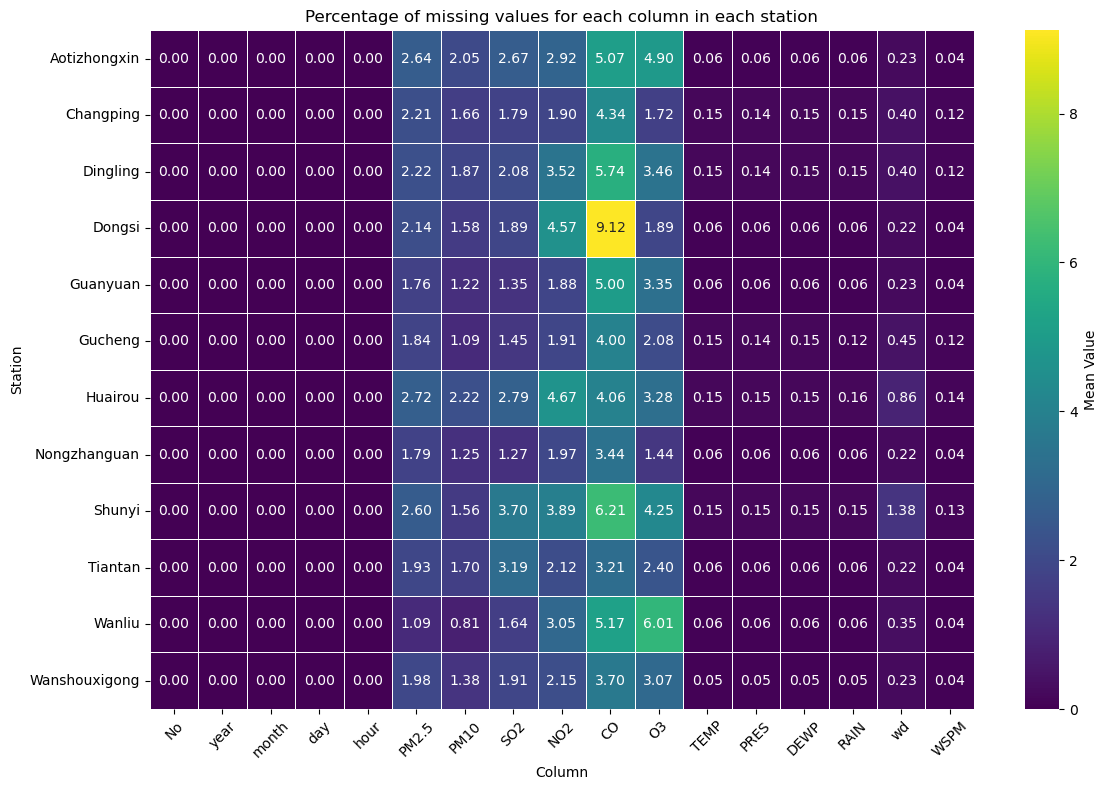

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(missing_percentage_station, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Mean Value'})
plt.title('Percentage of missing values for each column in each station')
plt.xlabel('Column')
plt.ylabel('Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dongsi's CO values has most significant misisng values, followed with Shunyi's, and Wanliu's O3

#### Statistical description and histogram for all parameter

Get statistical description (including distribution and correlation), their respective plot (histogram and heatmap) for all numerical and categorical parameter

In [13]:
combined_df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

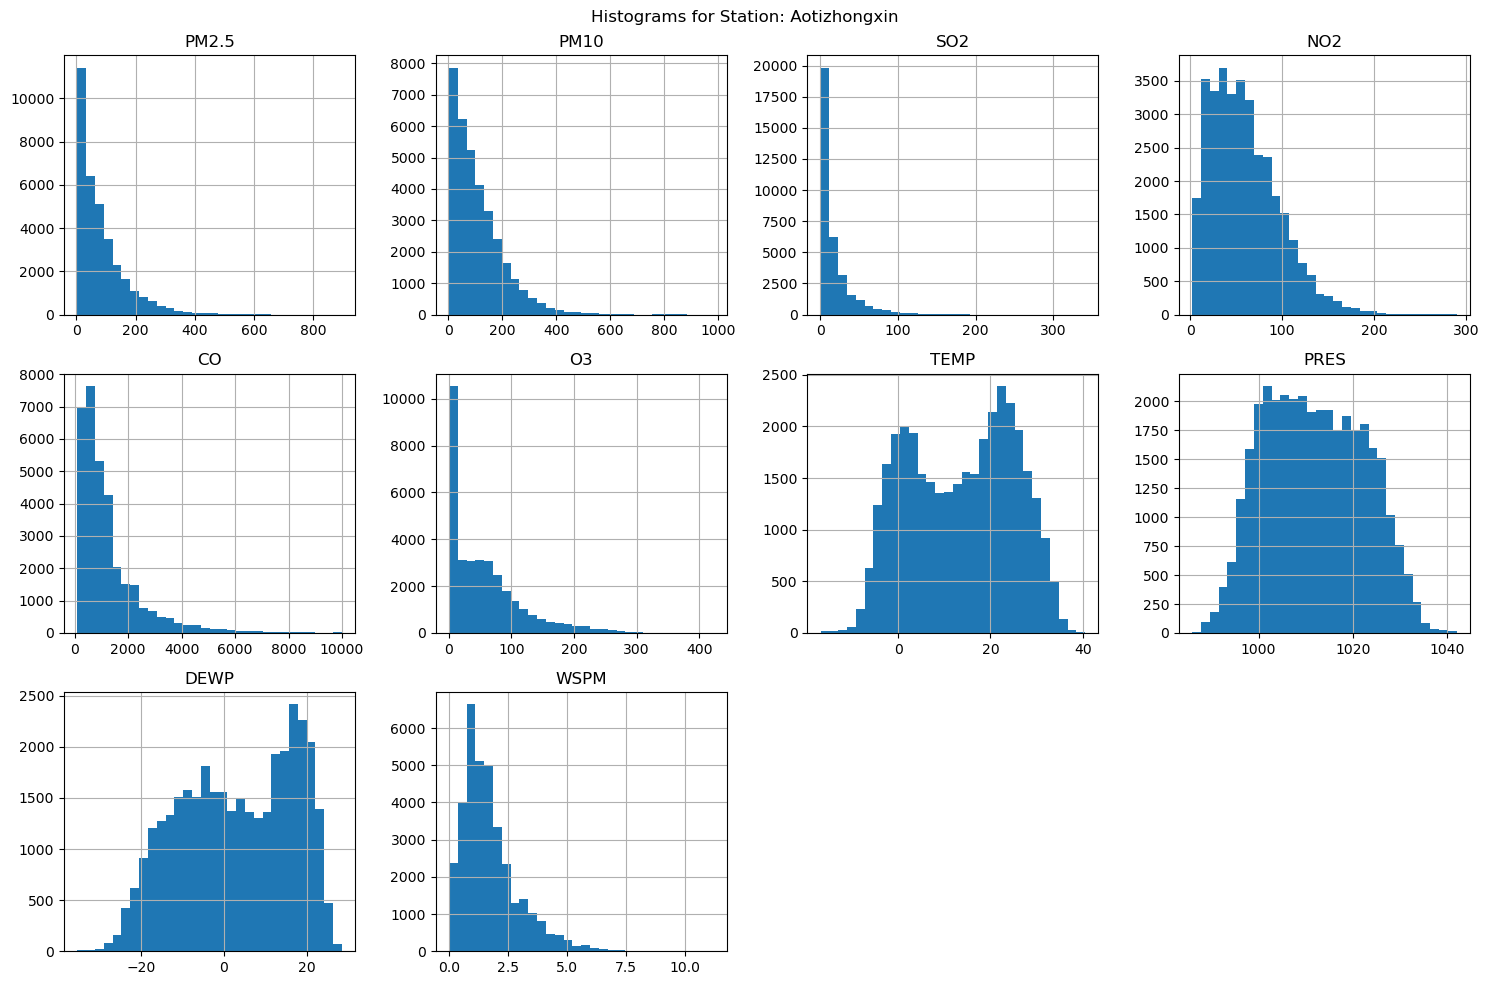

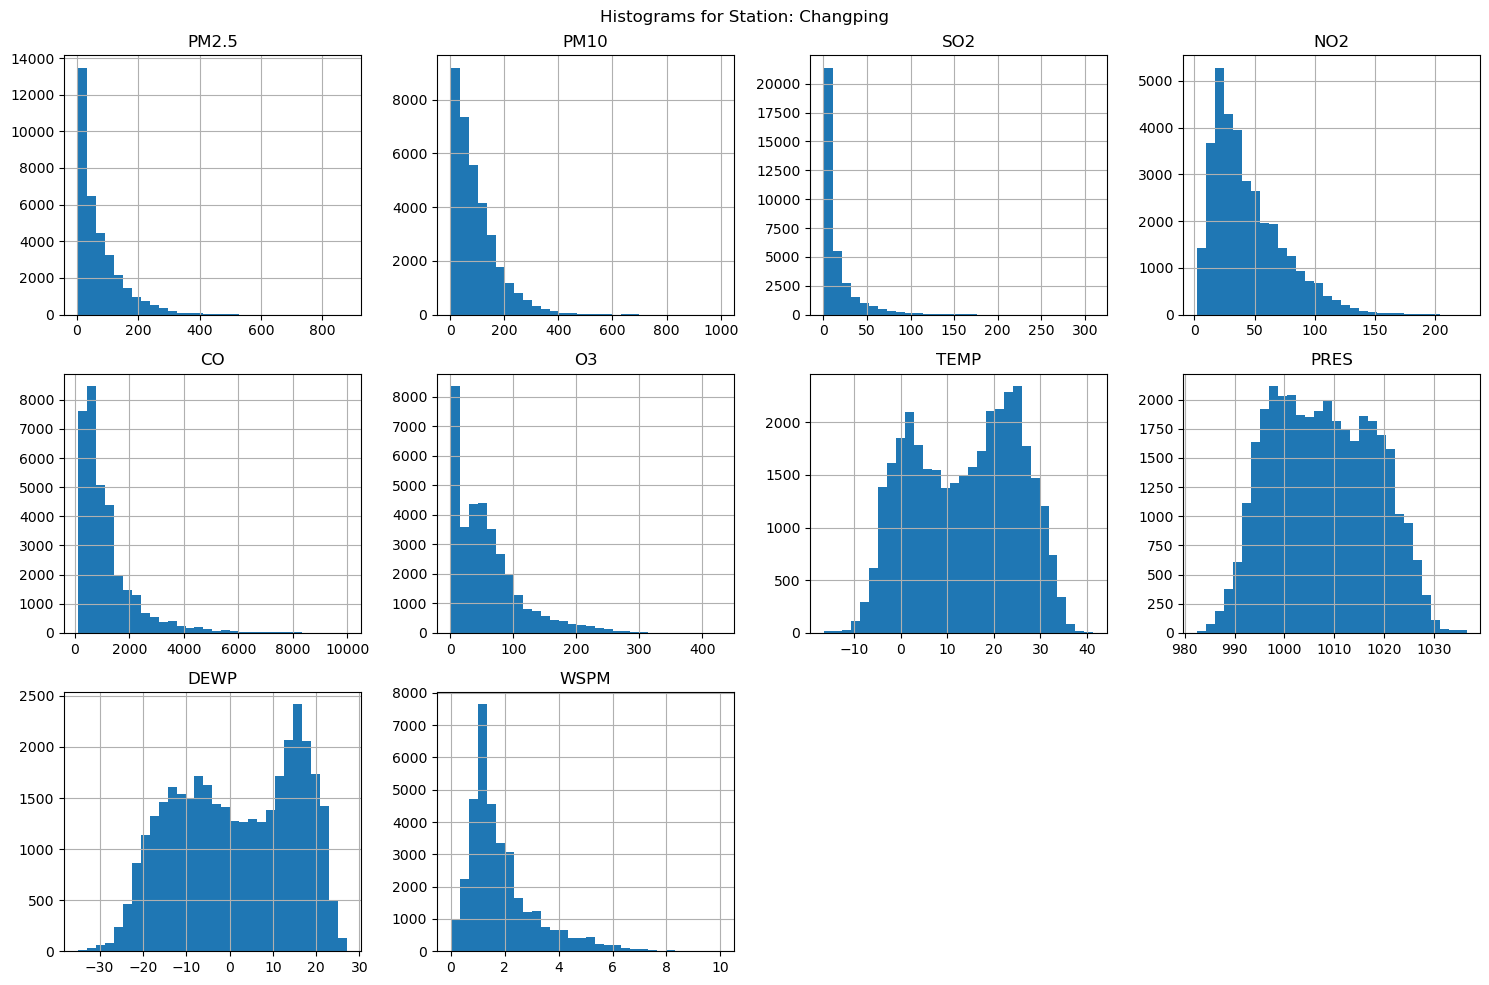

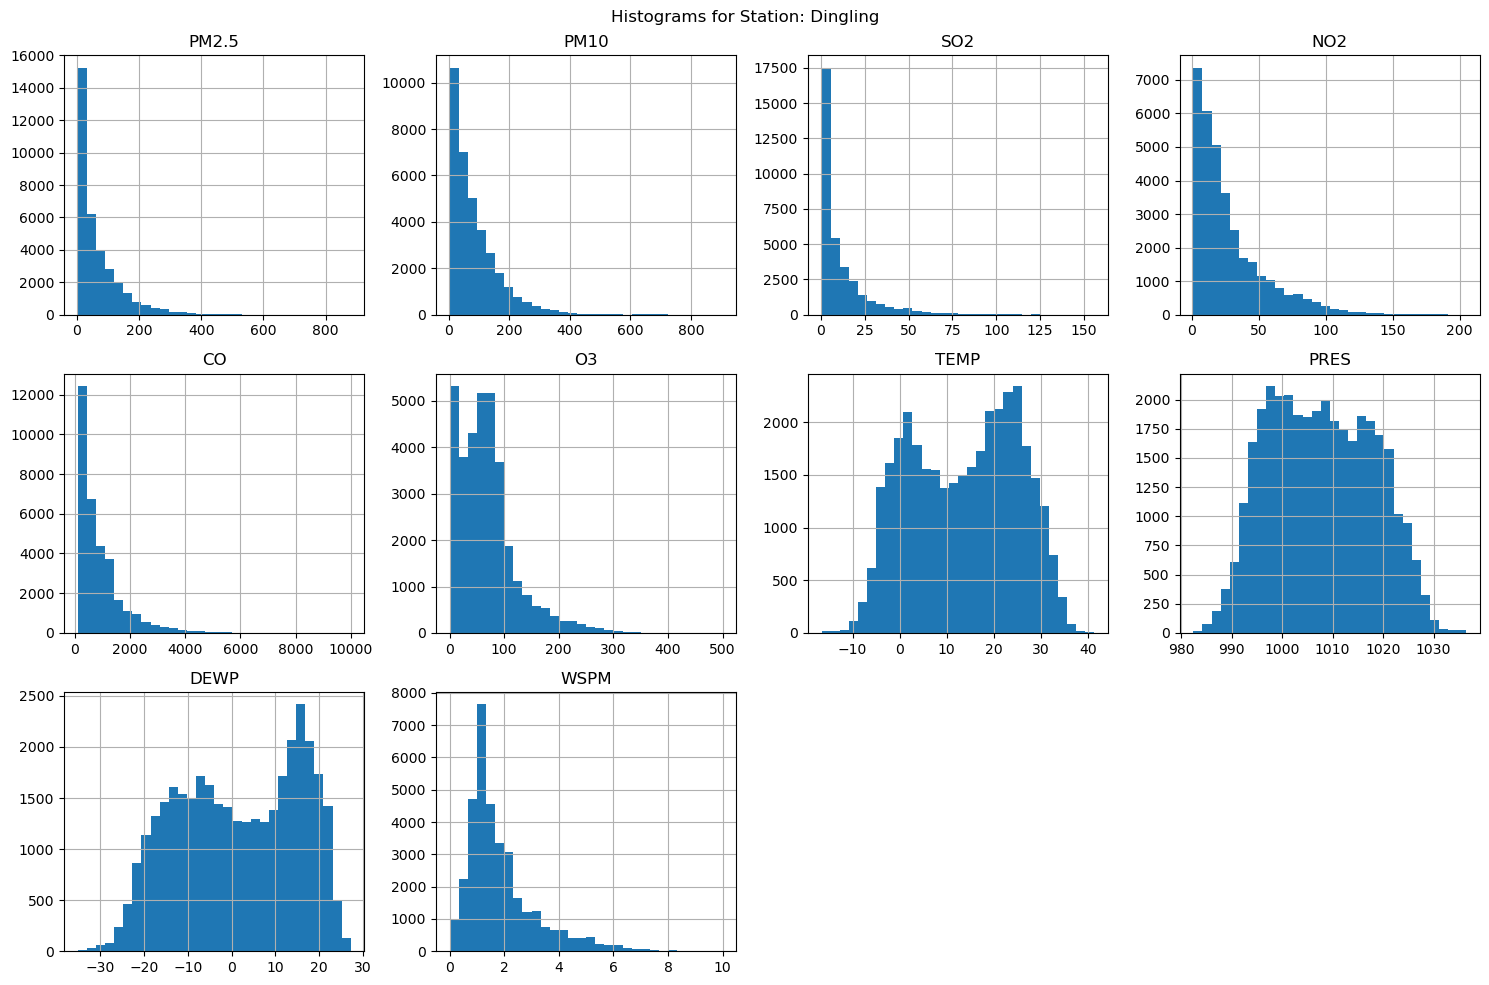

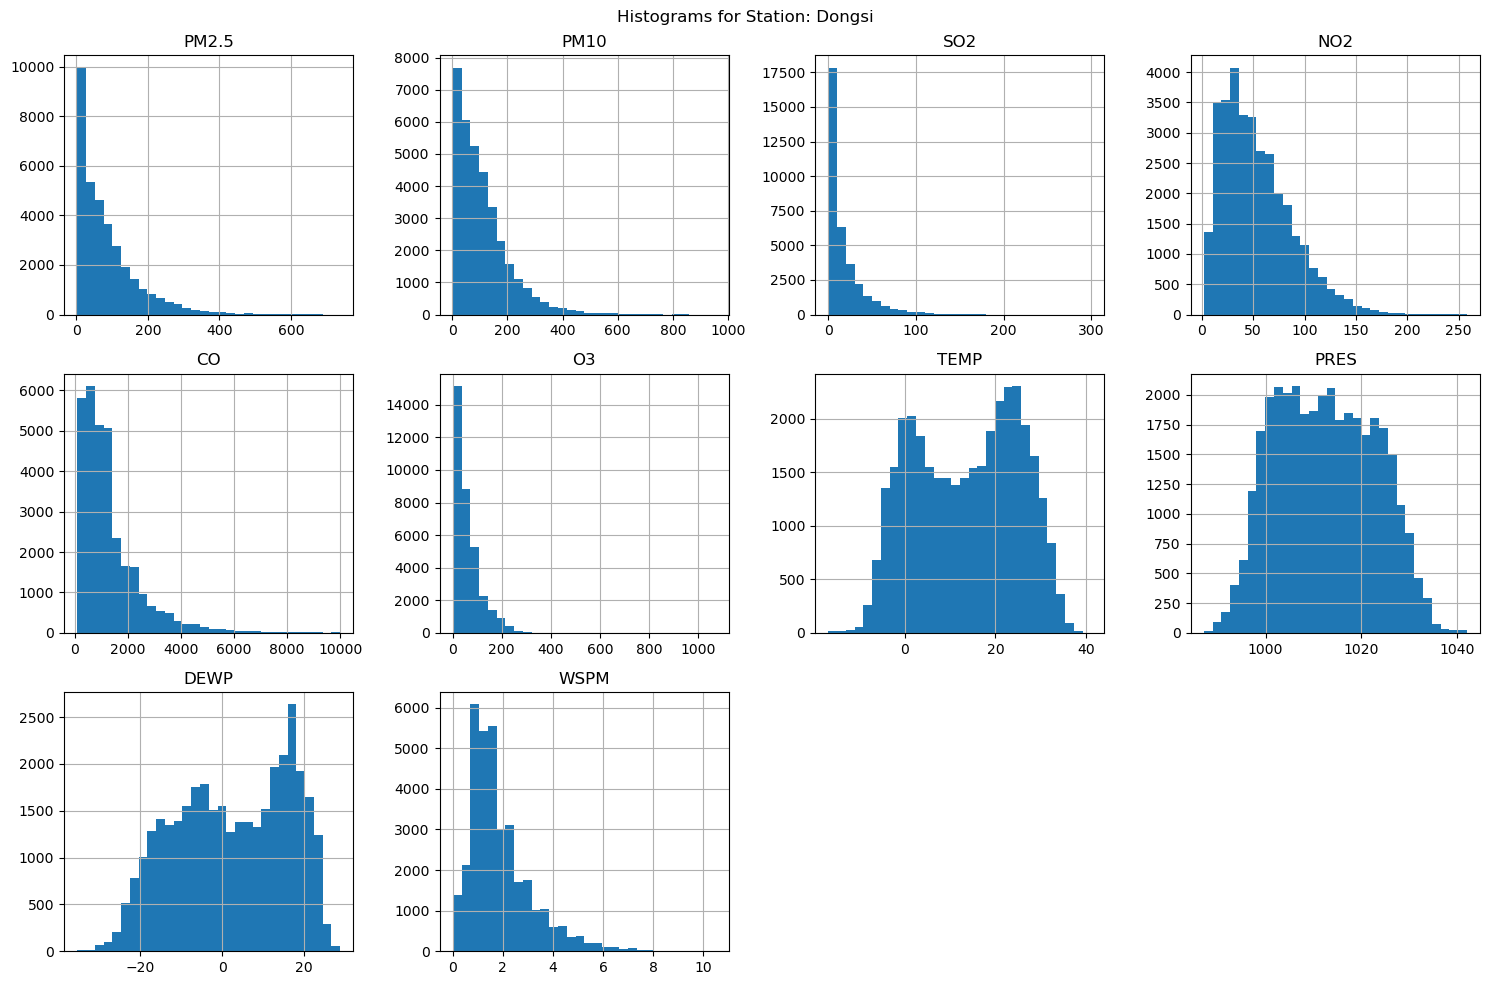

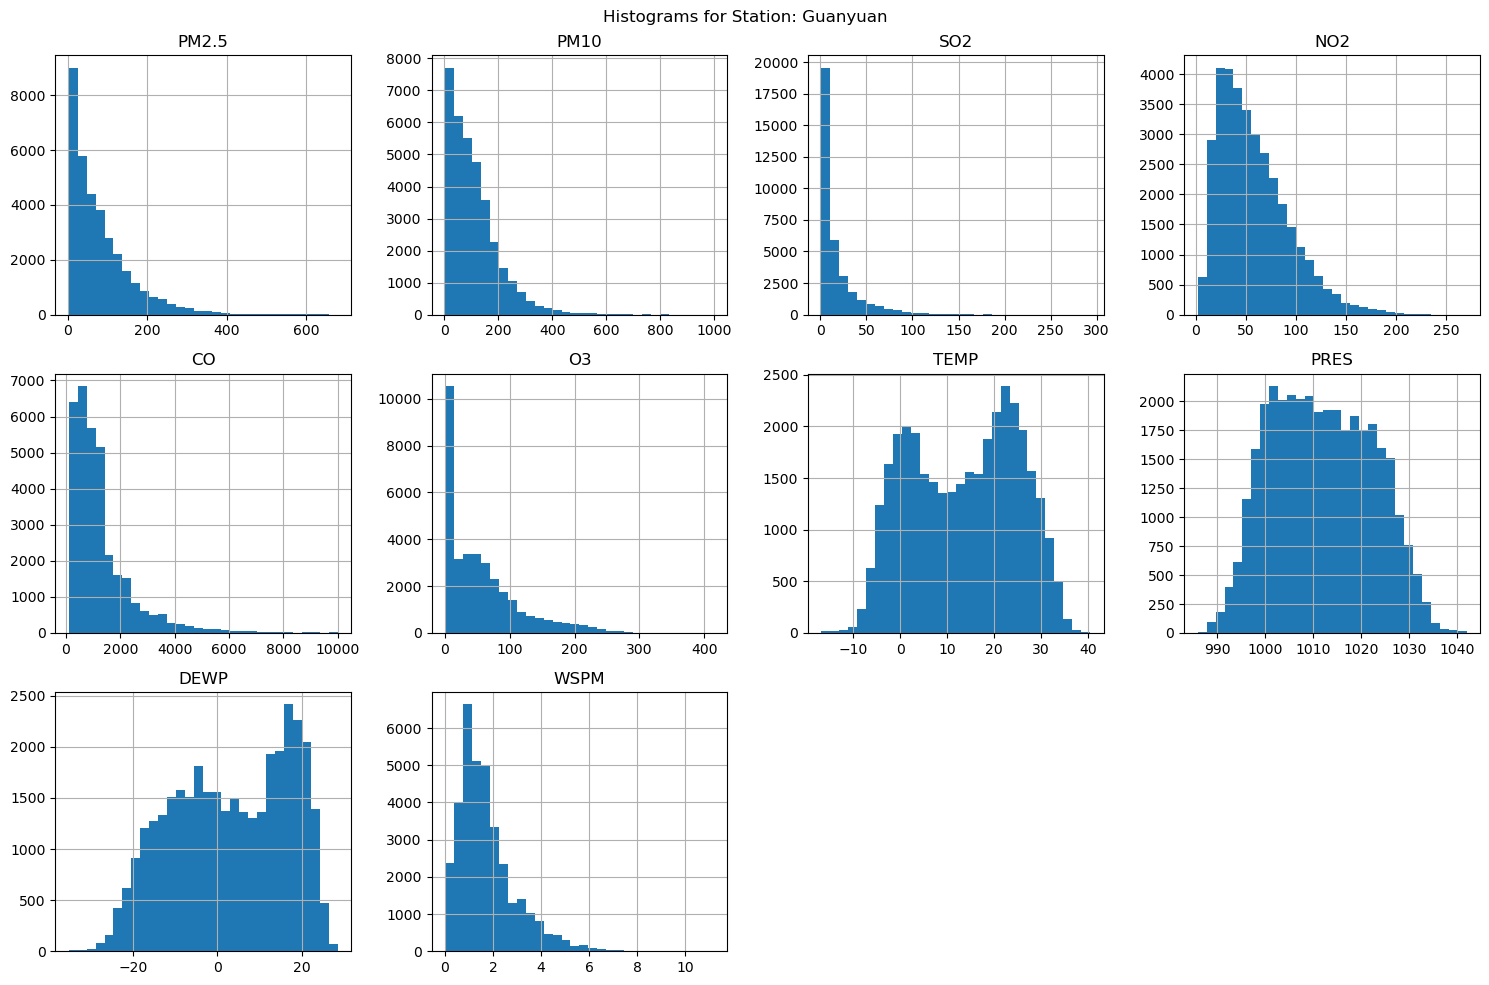

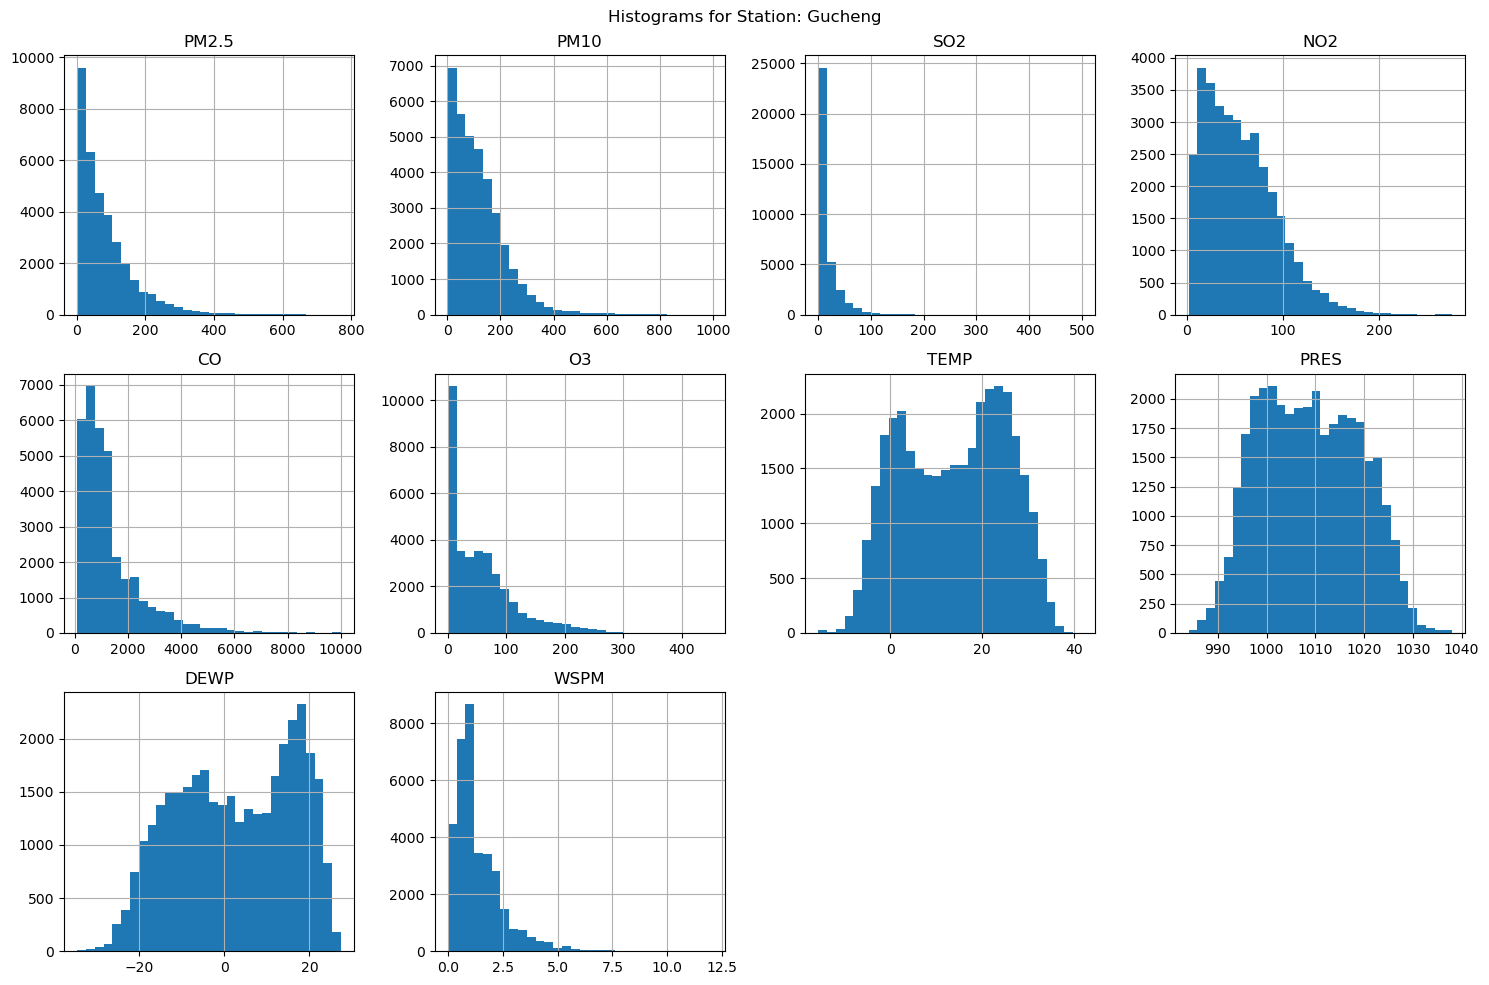

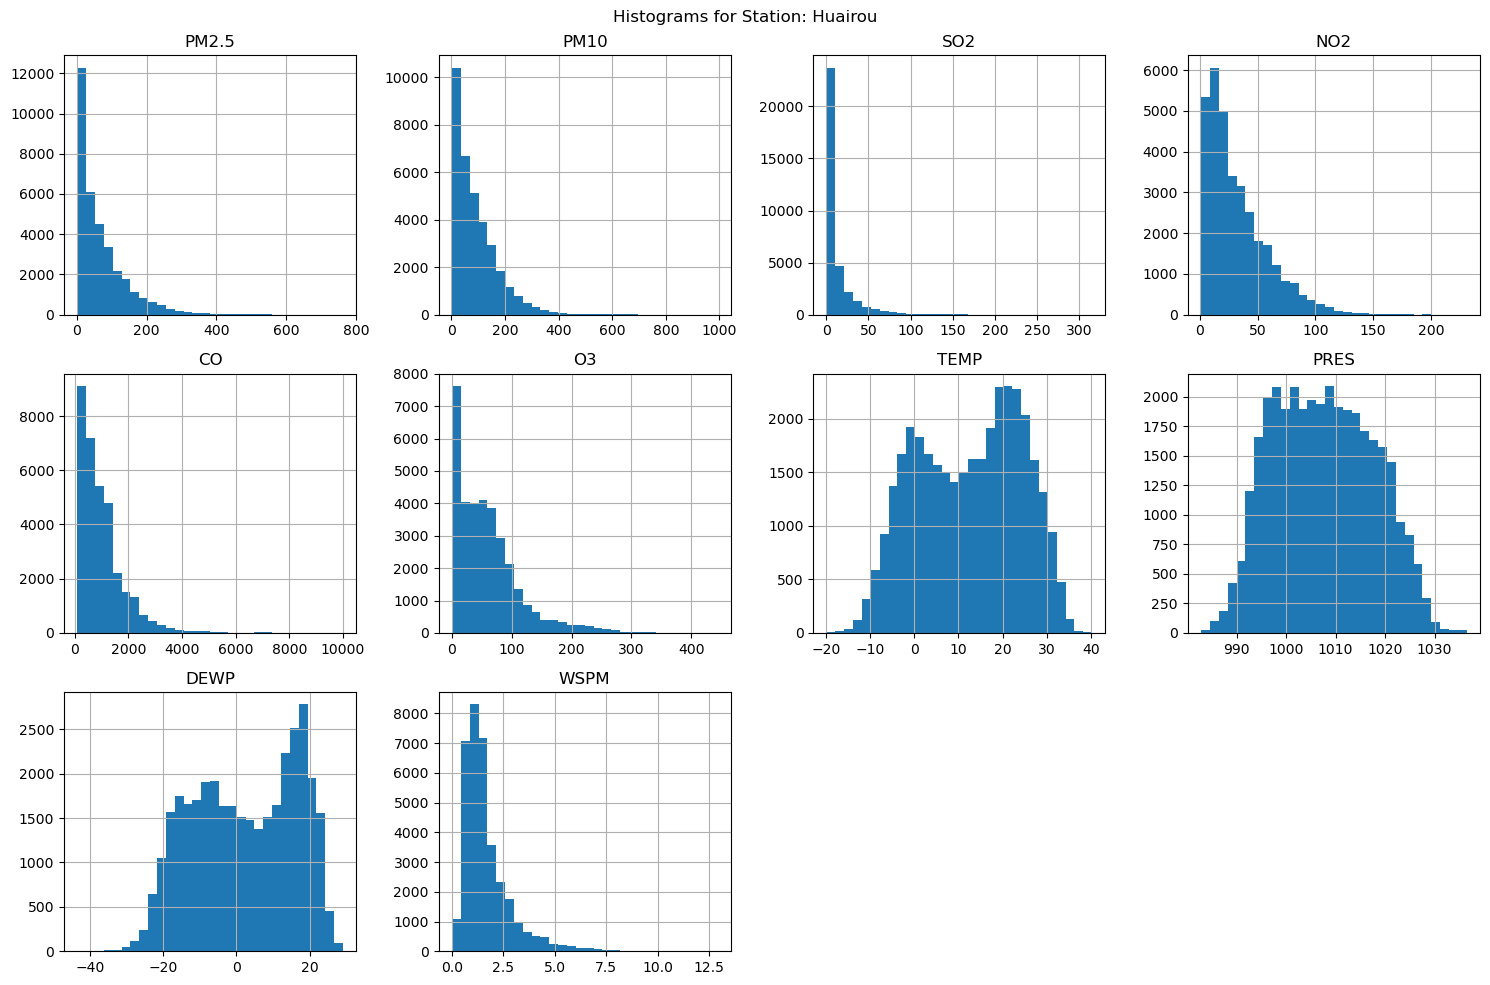

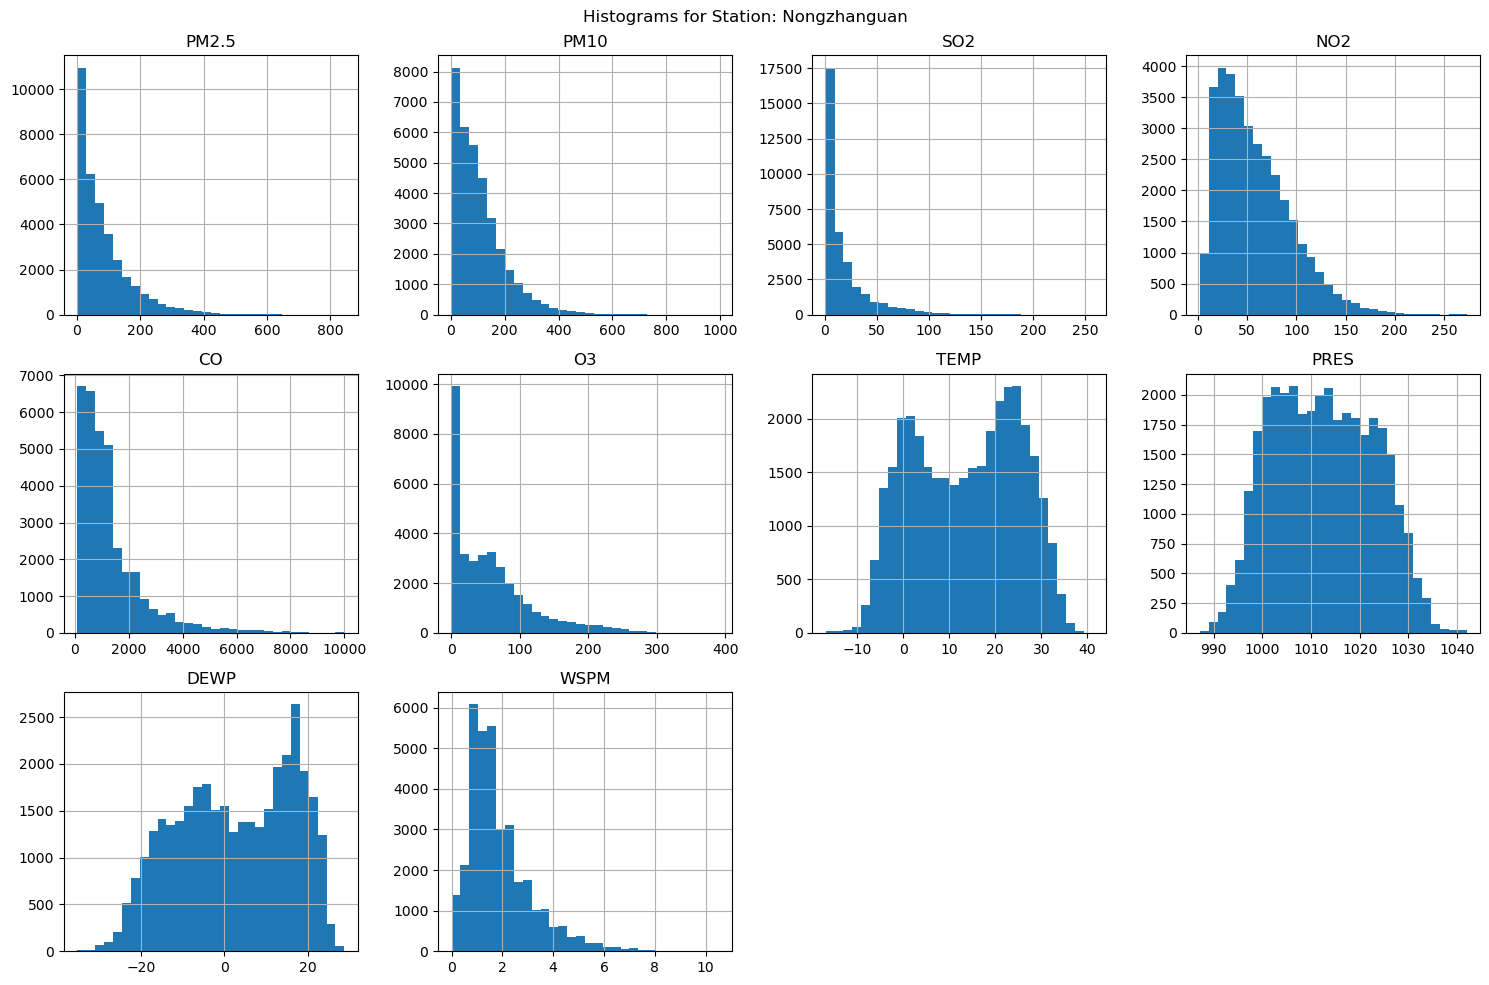

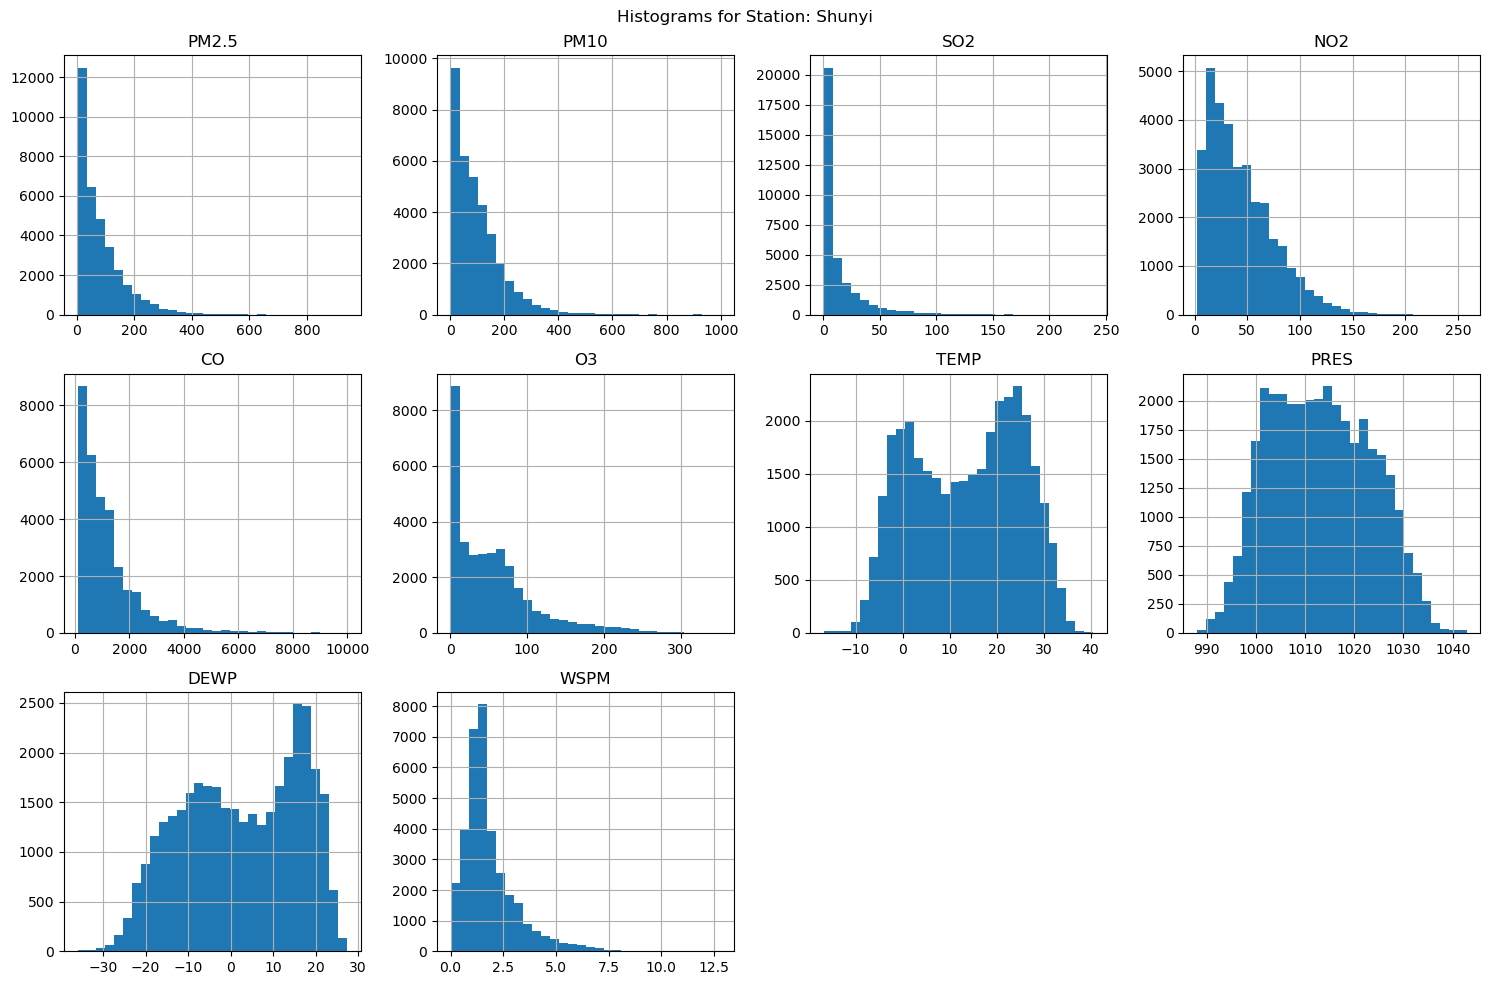

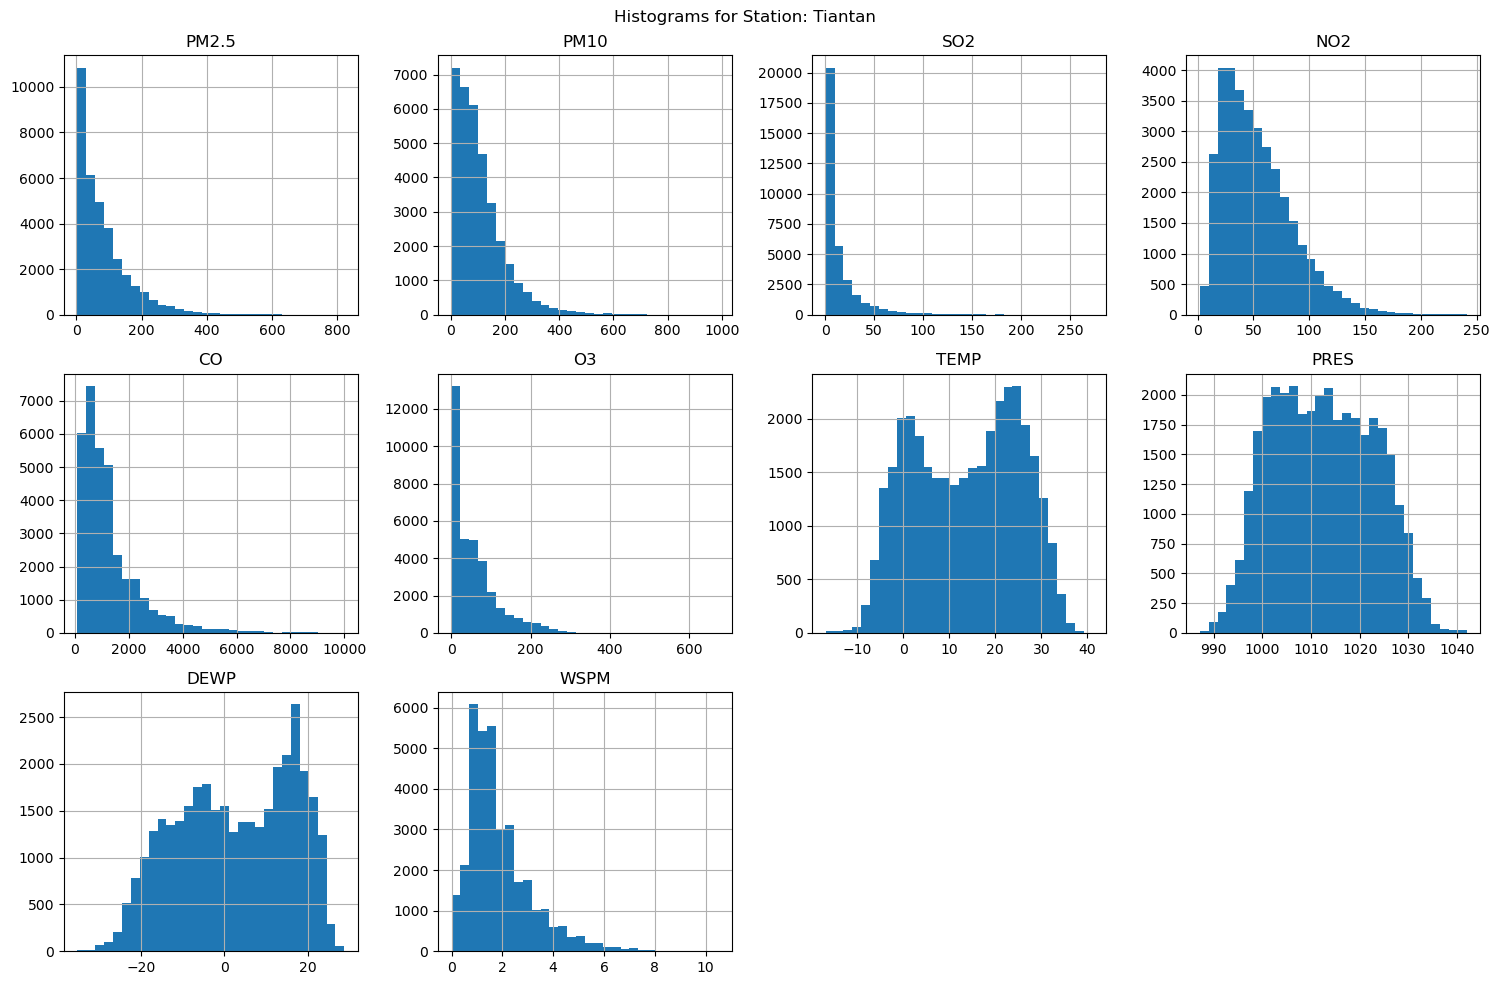

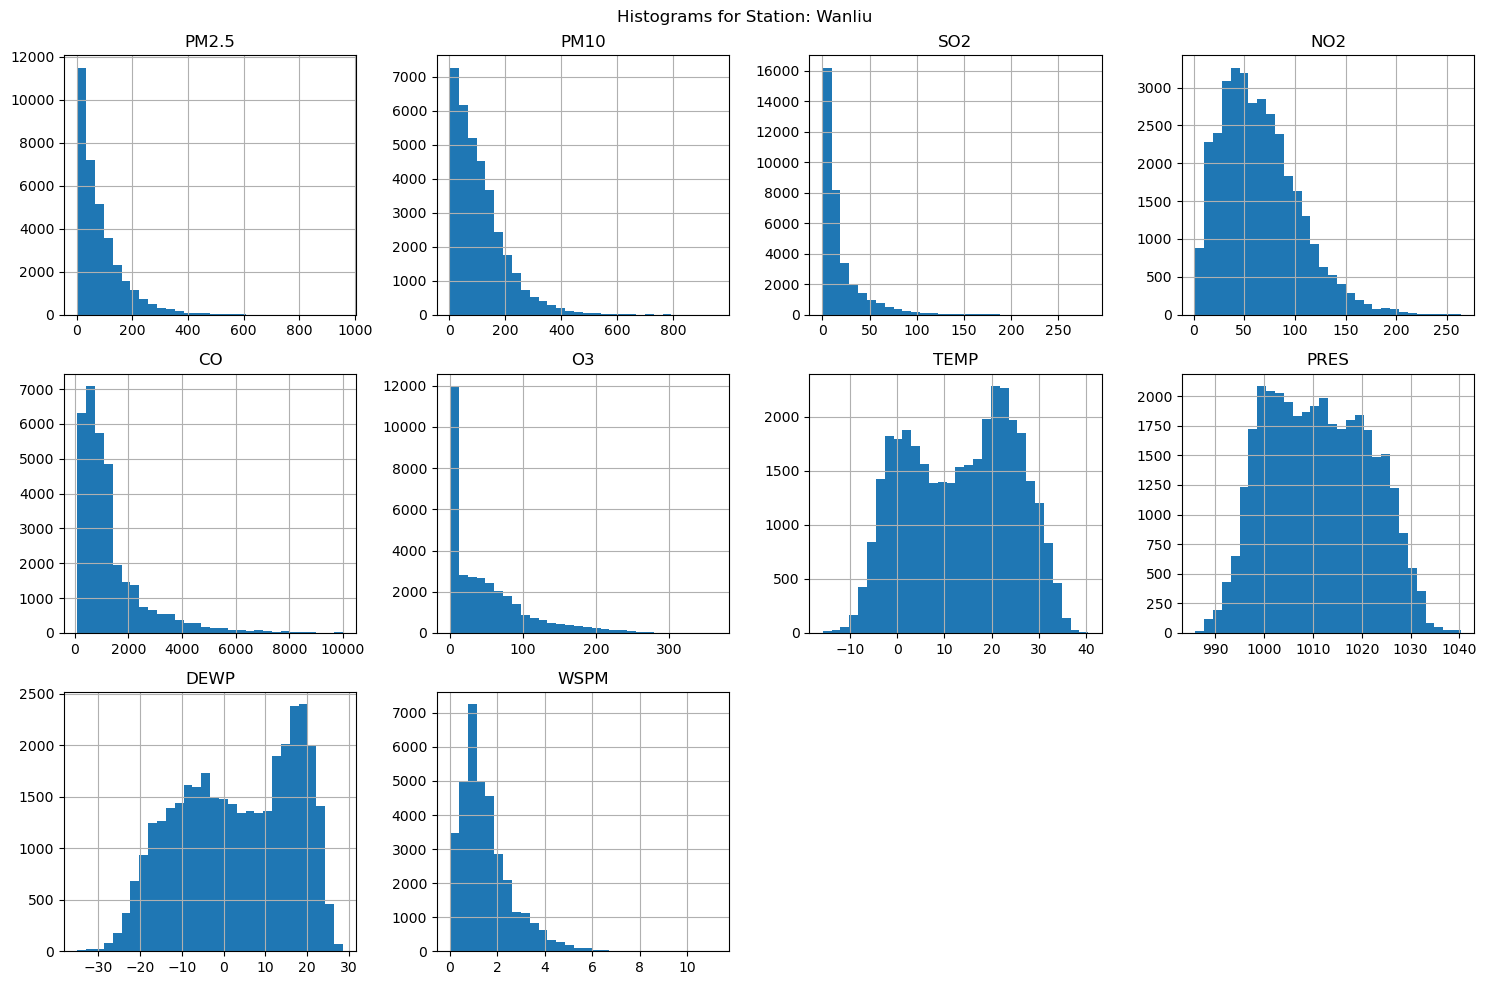

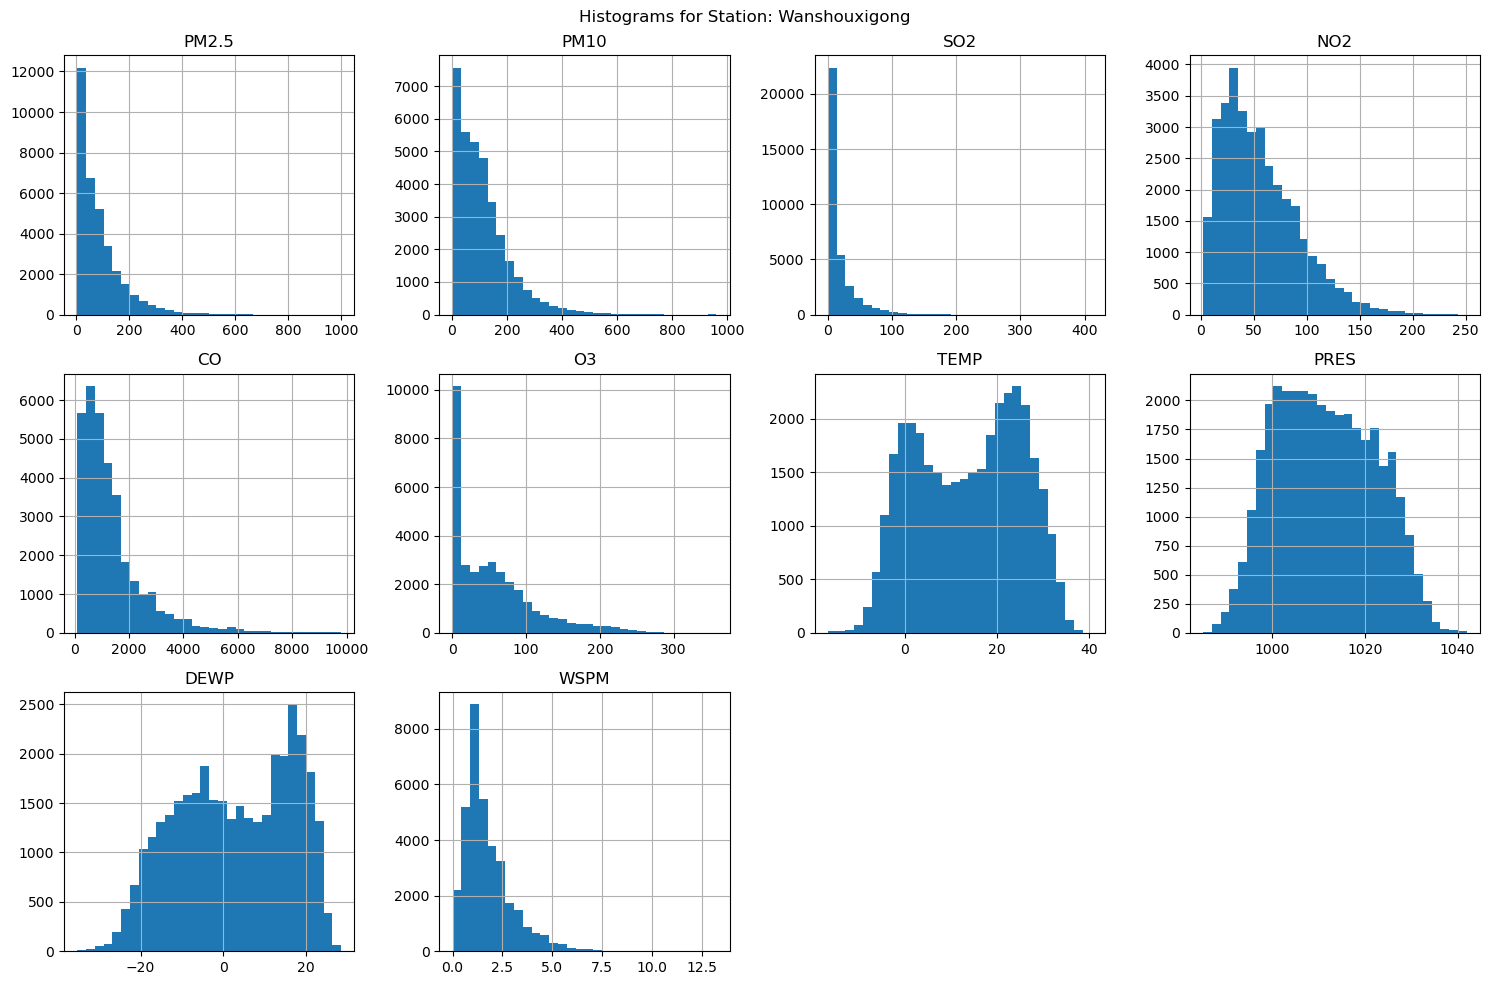

In [20]:
# Get unique stations
stations = combined_df['station'].unique()

# Create histograms for each station
for station in stations:
    # Filter data for the current station
    station_df = histogram_df[combined_df['station'] == station]
    
    # Create histograms
    station_df.hist(figsize=(15, 10), bins=30, layout=(3, 4))
    
    # Add title
    plt.suptitle(f'Histograms for Station: {station}')
    
    # Adjust the layout to fit the plots
    plt.tight_layout()
    
    # Show plot
    plt.show()

C:\Users\ALDY\AppData\Local\Temp\ipykernel_1440\1213238646.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wind_direction_df.fillna(0, inplace=True)


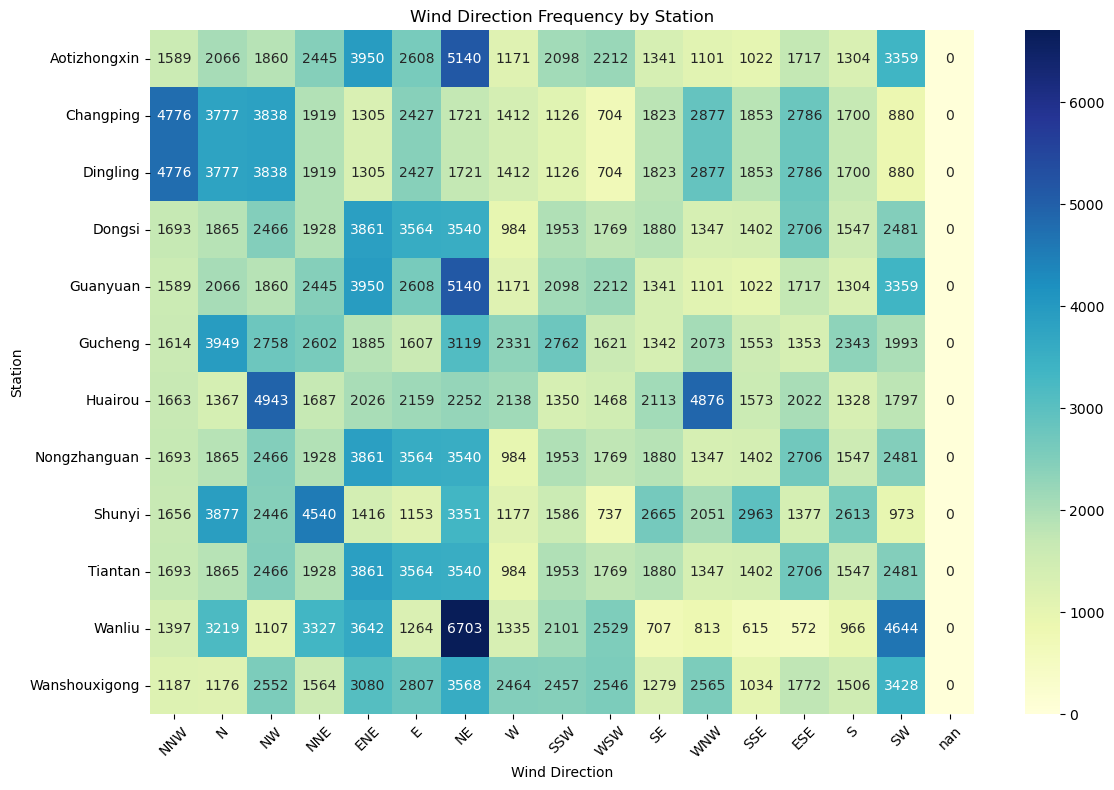

In [36]:
# Initialize an empty DataFrame to store the wind direction counts for each station
wind_direction_df = pd.DataFrame(index=stations, columns=combined_df['wd'].unique())

# Loop through each station
for station in stations:
    # Filter data for the current station
    station_data = combined_df[combined_df['station'] == station]
    
    # Calculate wind direction counts for the current station
    wind_direction_counts = station_data['wd'].value_counts()
    
    # Add wind direction counts to the DataFrame
    wind_direction_df.loc[station] = wind_direction_counts

# Fill missing values with 0
wind_direction_df.fillna(0, inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(wind_direction_df, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Wind Direction Frequency by Station')
plt.xlabel('Wind Direction')
plt.ylabel('Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
histogram_df.corr()

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.884380  0.482354  0.666948  0.789998 -0.149697 -0.131127   
PM10   0.884380  1.000000  0.462651  0.652193  0.702363 -0.111294 -0.096209   
SO2    0.482354  0.462651  1.000000  0.499496  0.535750 -0.165341 -0.321799   
NO2    0.666948  0.652193  0.499496  1.000000  0.705500 -0.471587 -0.278192   
CO     0.789998  0.702363  0.535750  0.705500  1.000000 -0.313012 -0.326237   
O3    -0.149697 -0.111294 -0.165341 -0.471587 -0.313012  1.000000  0.594910   
TEMP  -0.131127 -0.096209 -0.321799 -0.278192 -0.326237  0.594910  1.000000   
PRES   0.018566 -0.017971  0.223236  0.174167  0.188195 -0.445961 -0.813309   
DEWP   0.114656  0.070310 -0.266781 -0.031599 -0.057129  0.312074  0.820118   
WSPM  -0.272205 -0.183665 -0.108717 -0.400460 -0.297511  0.295743  0.033036   

           PRES      DEWP      WSPM  
PM2.5  0.018566  0.114656 -0.272205  
PM10  -0.017971  0.070310 -0.183665  
SO2    0.223236 -0.266781 -0.108717  
NO2    0.174167 -0.031599 -0.400460  
CO     0.188195 -0.057129 -0.297511  
O3    -0.445961  0.312074  0.295743  
TEMP  -0.813309  0.820118  0.033036  
PRES   1.000000 -0.750222  0.065099  
DEWP  -0.750222  1.000000 -0.296591  
WSPM   0.065099 -0.296591  1.000000

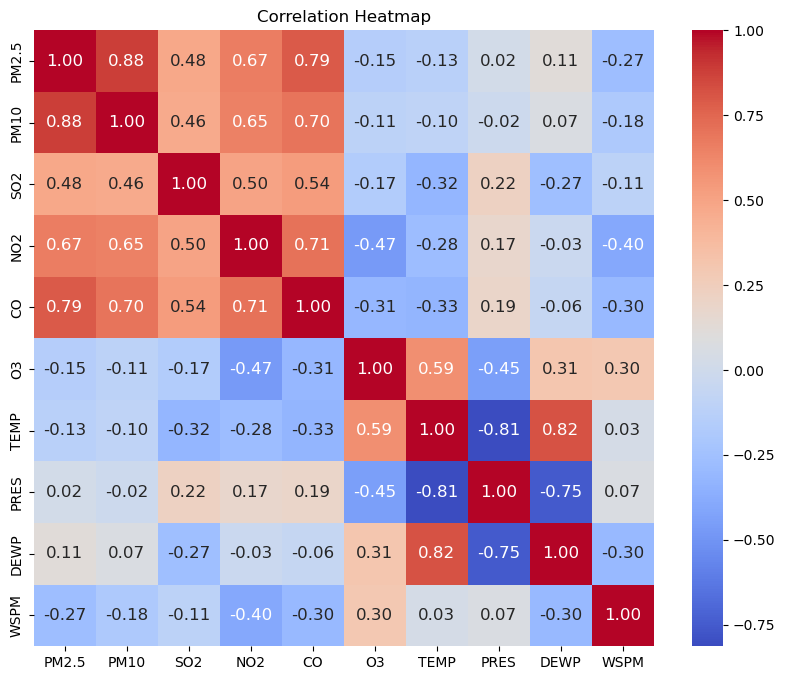

In [17]:
# Calculate the correlation matrix
correlation_matrix = histogram_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot = True, annot_kws = {"size": 12}, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Cleaning Data

Lots of data has skewed right distribution in each station. To imputate the missing values, let's use the 50% value in each column of each station's distribution. For wind direction, assume it's the highest frequency in each station.

In [45]:
# Define a function to impute missing values in each station's data
def impute_missing_values(station_data):
    # Impute missing values for numerical columns using the 50th percentile
    station_data_numeric = station_data.select_dtypes(include='number')
    station_data[station_data_numeric.columns] = station_data_numeric.fillna(station_data_numeric.median())
    
    # Impute missing values for wind direction using mode (highest frequency)
    station_data_categorical = station_data.select_dtypes(exclude='number')
    station_data[station_data_categorical.columns] = station_data_categorical.apply(lambda x: x.fillna(x.mode().iloc[0]))

    return station_data

# Group the combined_df DataFrame by station and apply the impute_missing_values function to each group
imputed_df = combined_df.groupby('station').apply(impute_missing_values).reset_index(drop=True)

# Display the imputed DataFrame
imputed_df

C:\Users\ALDY\AppData\Local\Temp\ipykernel_1440\4112867219.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  imputed_df = combined_df.groupby('station').apply(impute_missing_values).reset_index(drop=True)


No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

In [57]:
# Filter float type columns
float_columns = imputed_df.select_dtypes(include='float64').columns

# Calculate the mean for the float type columns grouped by 'station'
station_means = imputed_df.groupby('station')[float_columns].median()

In [89]:
print("Median values for float type columns grouped by each station (2013-2017):")
station_means

Median values for float type columns grouped by each station (2013-2017):


PM2.5  PM10   SO2   NO2      CO       O3  TEMP    PRES  DEWP  \
station                                                                       
Aotizhongxin    58.0  87.0   9.0  53.0   900.0  42.0000  14.5  1011.4   3.8   
Changping       46.0  72.0   7.0  36.0   800.0  46.0000  14.7  1007.4   1.8   
Dingling        41.0  60.0   5.0  19.0   600.0  61.0000  14.7  1007.4   1.8   
Dongsi          61.0  86.0  10.0  47.0  1000.0  44.1252  14.6  1012.2   3.0   
Guanyuan        59.0  89.0   8.0  51.0   900.0  41.0000  14.5  1011.4   3.8   
Gucheng         60.0  99.0   7.0  50.0   900.0  45.0000  14.8  1008.5   3.0   
Huairou         47.0  69.0   4.0  25.0   800.0  49.0000  13.6  1007.3   2.7   
Nongzhanguan    59.0  85.0   9.0  51.0   900.0  45.0000  14.6  1012.2   3.0   
Shunyi          55.0  77.0   5.0  37.0   800.0  43.0000  14.4  1012.7   3.1   
Tiantan         59.0  85.0   7.0  47.0   900.0  40.0000  14.6  1012.2   3.0   
Wanliu          59.0  88.0  10.0  60.0   900.0  32.0000  14.3  1010.8   4.0   
Wanshouxigong   60.0  91.0   8.0  49.0  1000.0  42.0000  14.8  1011.0   3.3   

               RAIN  WSPM  
station                    
Aotizhongxin    0.0   1.4  
Changping       0.0   1.5  
Dingling        0.0   1.5  
Dongsi          0.0   1.5  
Guanyuan        0.0   1.4  
Gucheng         0.0   1.0  
Huairou         0.0   1.3  
Nongzhanguan    0.0   1.5  
Shunyi          0.0   1.5  
Tiantan         0.0   1.5  
Wanliu          0.0   1.2  
Wanshouxigong   0.0   1.4

## Exploratory Data Analysis (EDA)

### Explore Each Pollutant Average per Hour in Each Station

Select pollutant columns, then group by per hour to calculate pollutant median per hour in each station

In [154]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [155]:
median_pollutants = imputed_df.groupby([imputed_df['date'].dt.to_period('h'), 'station'])[pollutants].median().reset_index()

In [156]:
median_pollutants

date        station  PM2.5  PM10   SO2   NO2     CO    O3
0       2013-03-01 00:00   Aotizhongxin    4.0   4.0   4.0   7.0  300.0  77.0
1       2013-03-01 00:00      Changping    3.0   6.0  13.0   7.0  300.0  85.0
2       2013-03-01 00:00       Dingling    4.0   4.0   3.0  19.0  200.0  82.0
3       2013-03-01 00:00         Dongsi    9.0   9.0   3.0  17.0  300.0  89.0
4       2013-03-01 00:00       Guanyuan    4.0   4.0  14.0  20.0  300.0  69.0
...                  ...            ...    ...   ...   ...   ...    ...   ...
420763  2017-02-28 23:00   Nongzhanguan   10.0  28.0   7.0  48.0  600.0  39.0
420764  2017-02-28 23:00         Shunyi   15.0  22.0  13.0  34.0  500.0  60.0
420765  2017-02-28 23:00        Tiantan   15.0  50.0   5.0  68.0  700.0  21.0
420766  2017-02-28 23:00         Wanliu    7.0  25.0   6.0  86.0  700.0  11.0
420767  2017-02-28 23:00  Wanshouxigong   13.0  19.0   4.0  38.0  600.0  49.0

[420768 rows x 8 columns]

Plot the result

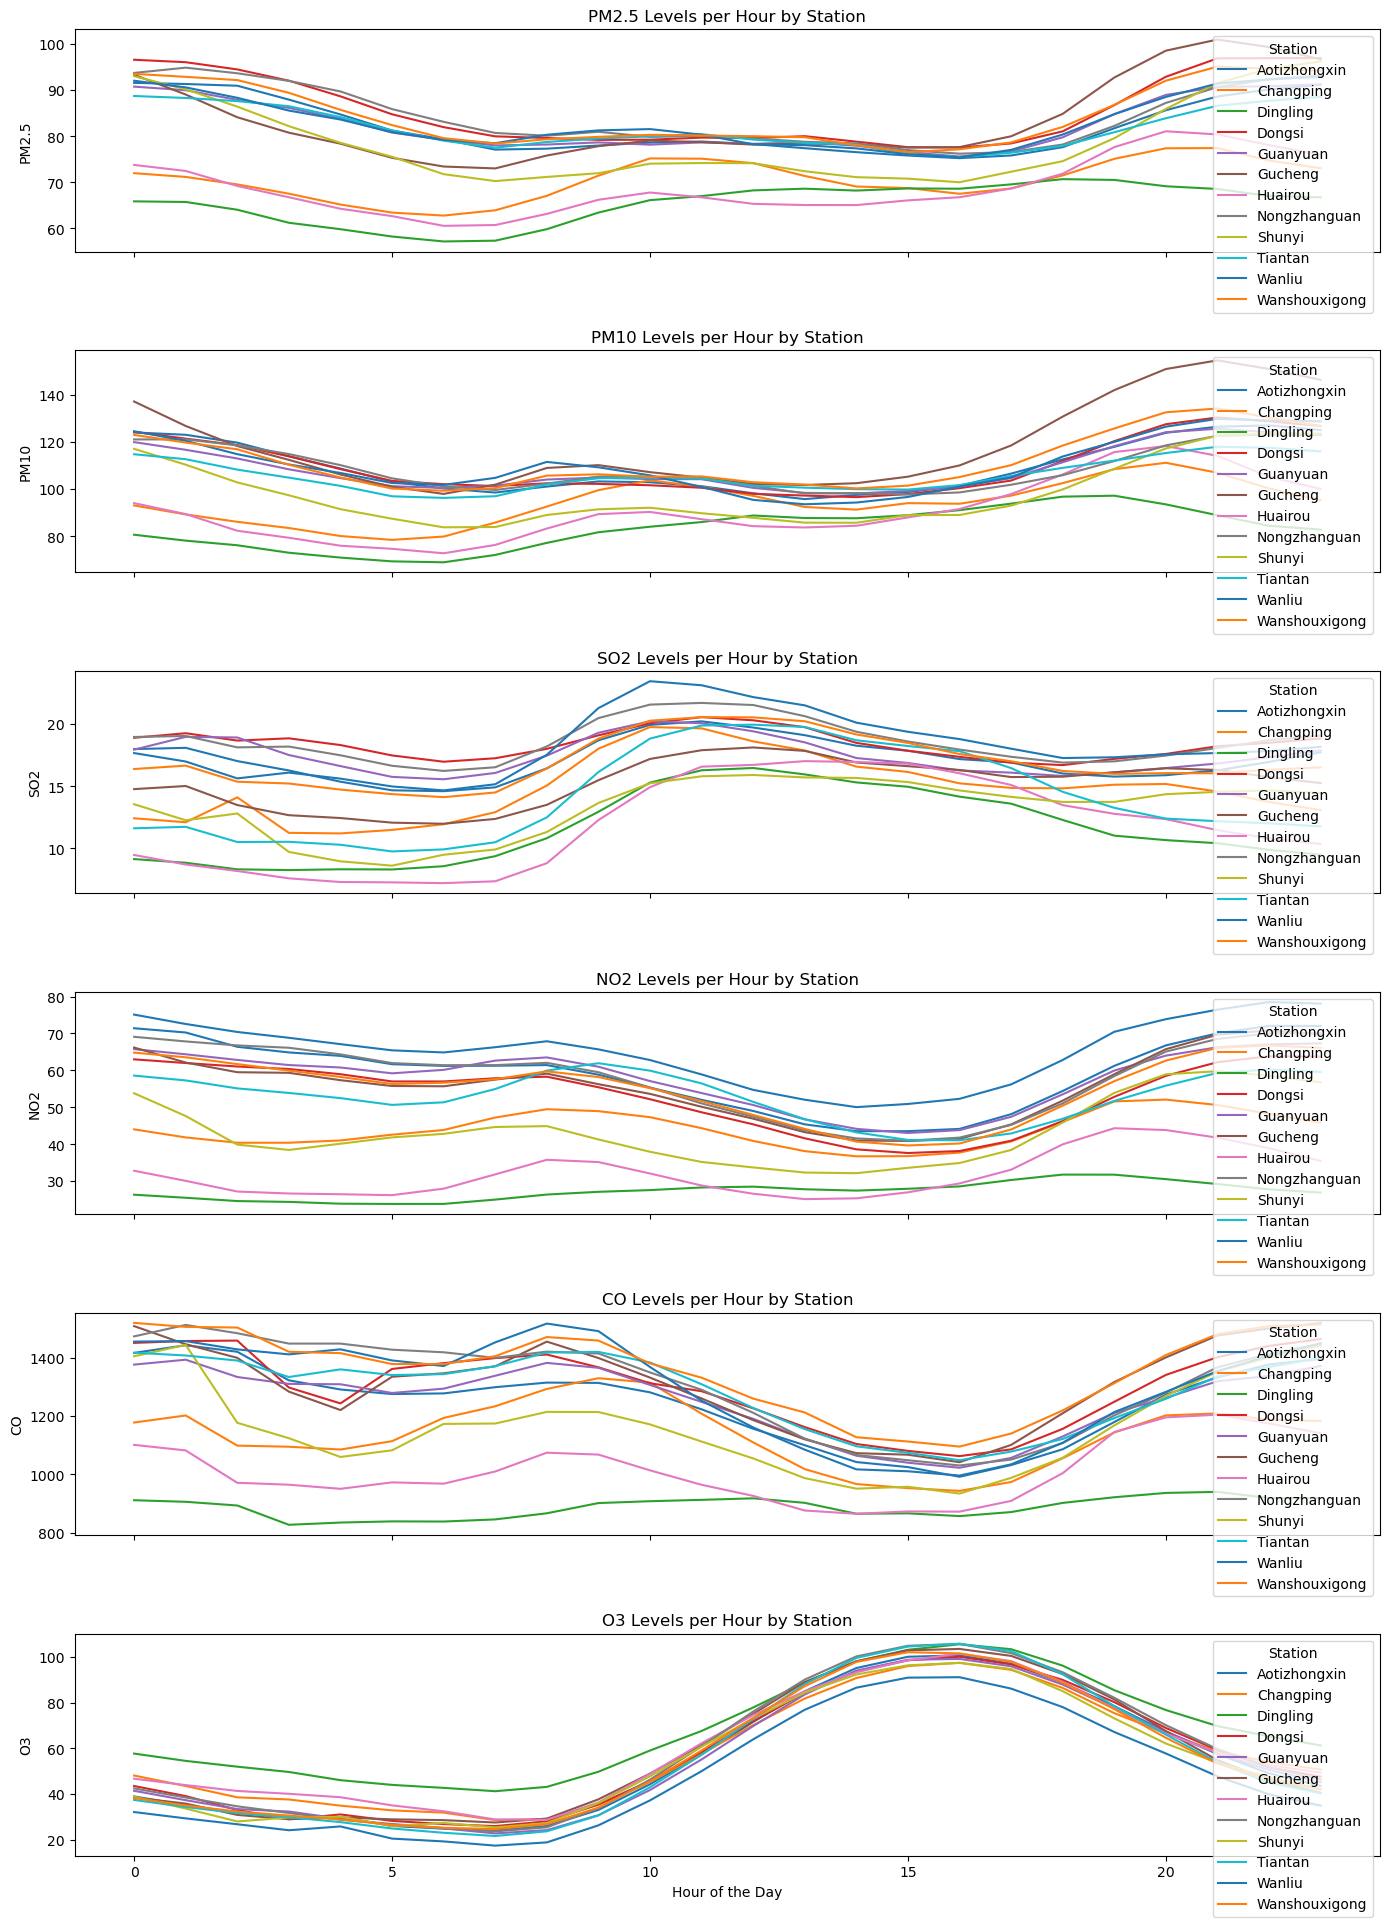

In [158]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(len(pollutants), 1, figsize=(14, 20), sharex=True)

# Plot each pollutant for each station
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    for station in imputed_df['station'].unique():
        station_data = imputed_df[imputed_df['station'] == station]
        station_hour_avg = station_data.groupby(station_data['date'].dt.hour)[pollutant].mean()
        ax.plot(station_hour_avg.index, station_hour_avg, label=station)
    ax.set_title(f'{pollutant} Levels per Hour by Station')
    ax.set_ylabel(pollutant)
    ax.legend(title='Station')

# Set common x-axis label
plt.xlabel('Hour of the Day')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pergerakan polusi di masing-masing stasiun selama 4 tahun?

In [39]:
# Select the pollutant columns using the specified column indices
pollutant_columns = combined_df.iloc[:, 5:11]

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pan

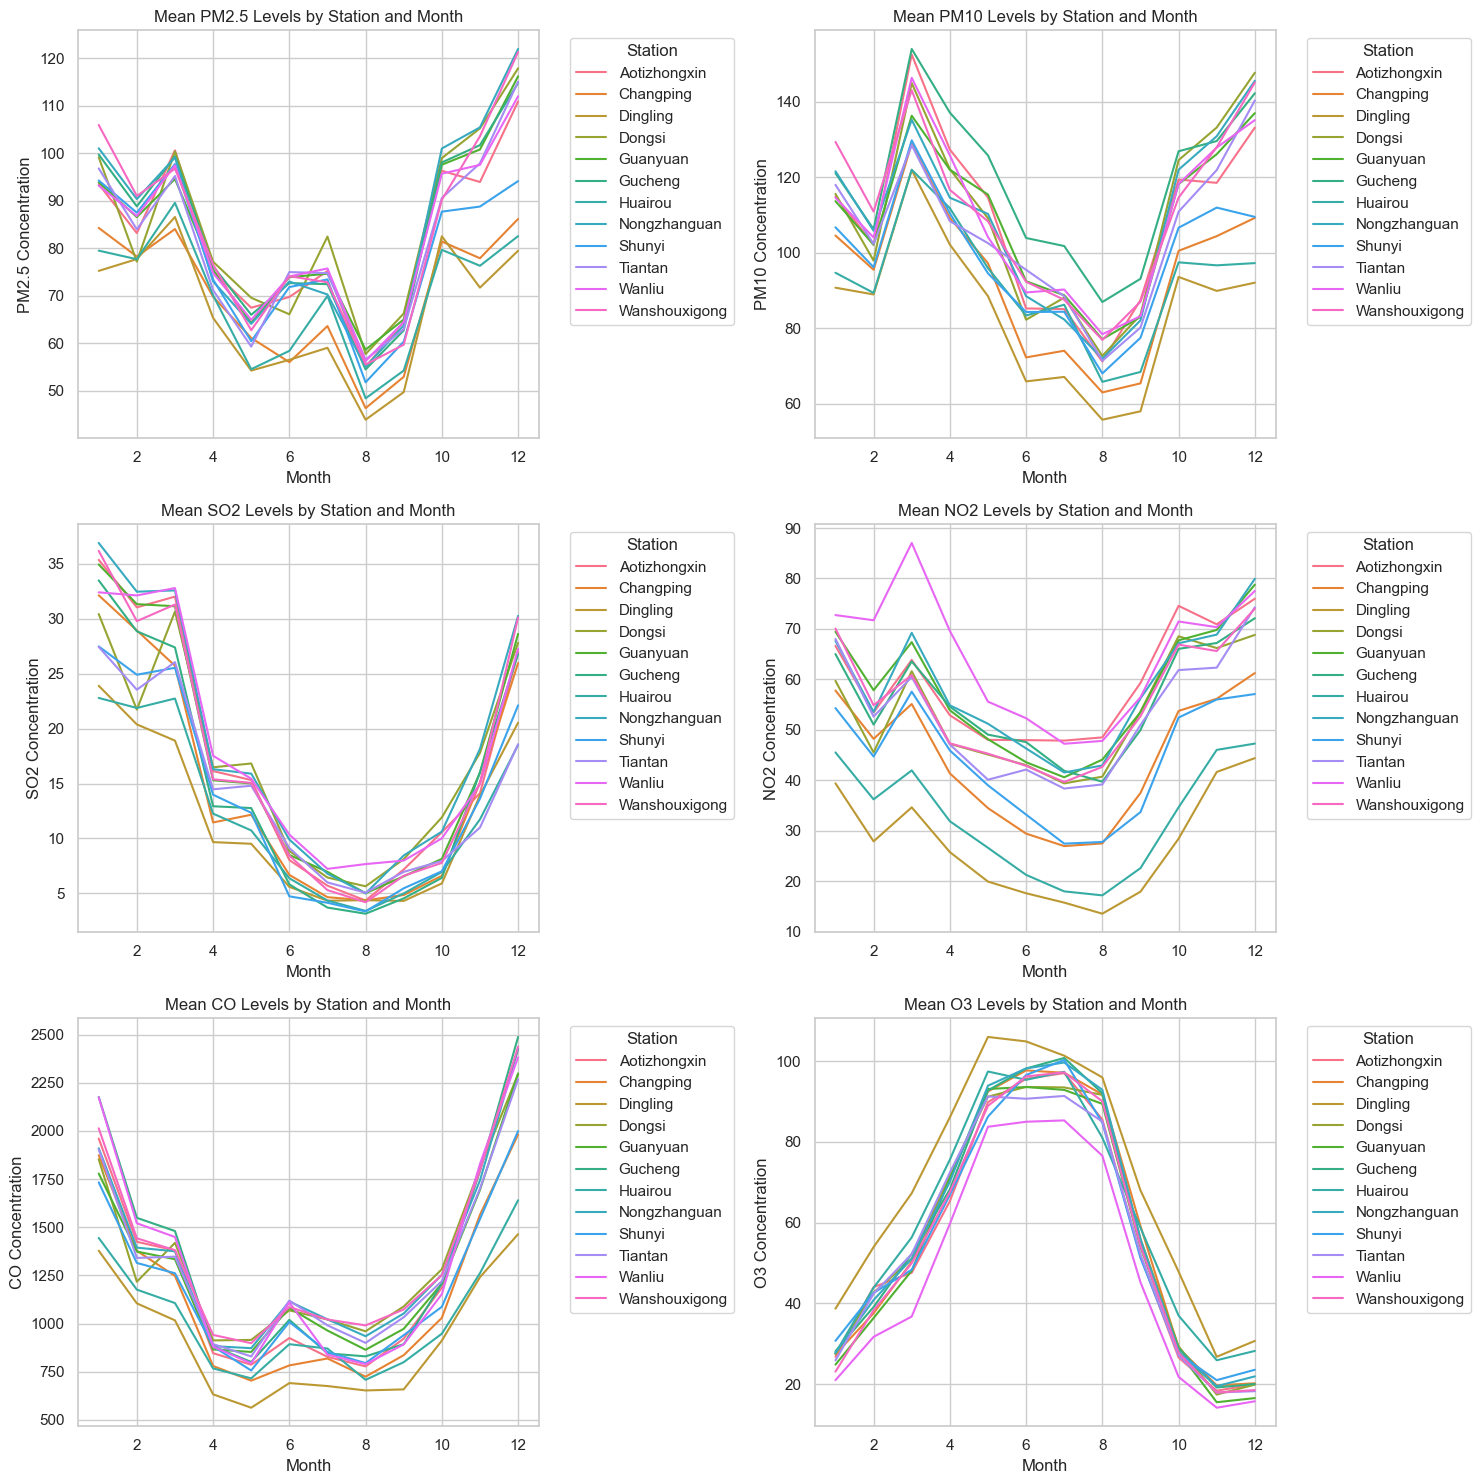

In [41]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Create a list of pollutants to iterate over
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Plot each pollutant
for i, pollutant in enumerate(pollutants):
    ax = axes[i // 2, i % 2]
    sns.lineplot(data=grouped_df, x='month', y=pollutant, hue='station', ax=ax)
    ax.set_title(f'Mean {pollutant} Levels by Station and Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'{pollutant} Concentration')
    ax.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()

In [32]:
# Adjust the layout
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
pollutant_columns

hour  PM2.5  PM10   SO2   NO2     CO
0          0    4.0   4.0   4.0   7.0  300.0
1          1    8.0   8.0   4.0   7.0  300.0
2          2    7.0   7.0   5.0  10.0  300.0
3          3    6.0   6.0  11.0  11.0  300.0
4          4    3.0   3.0  12.0  12.0  300.0
...      ...    ...   ...   ...   ...    ...
420763    19   11.0  32.0   3.0  24.0  400.0
420764    20   13.0  32.0   3.0  41.0  500.0
420765    21   14.0  28.0   4.0  38.0  500.0
420766    22   12.0  23.0   4.0  30.0  400.0
420767    23   13.0  19.0   4.0  38.0  600.0

[420768 rows x 6 columns]

TypeError: no numeric data to plot

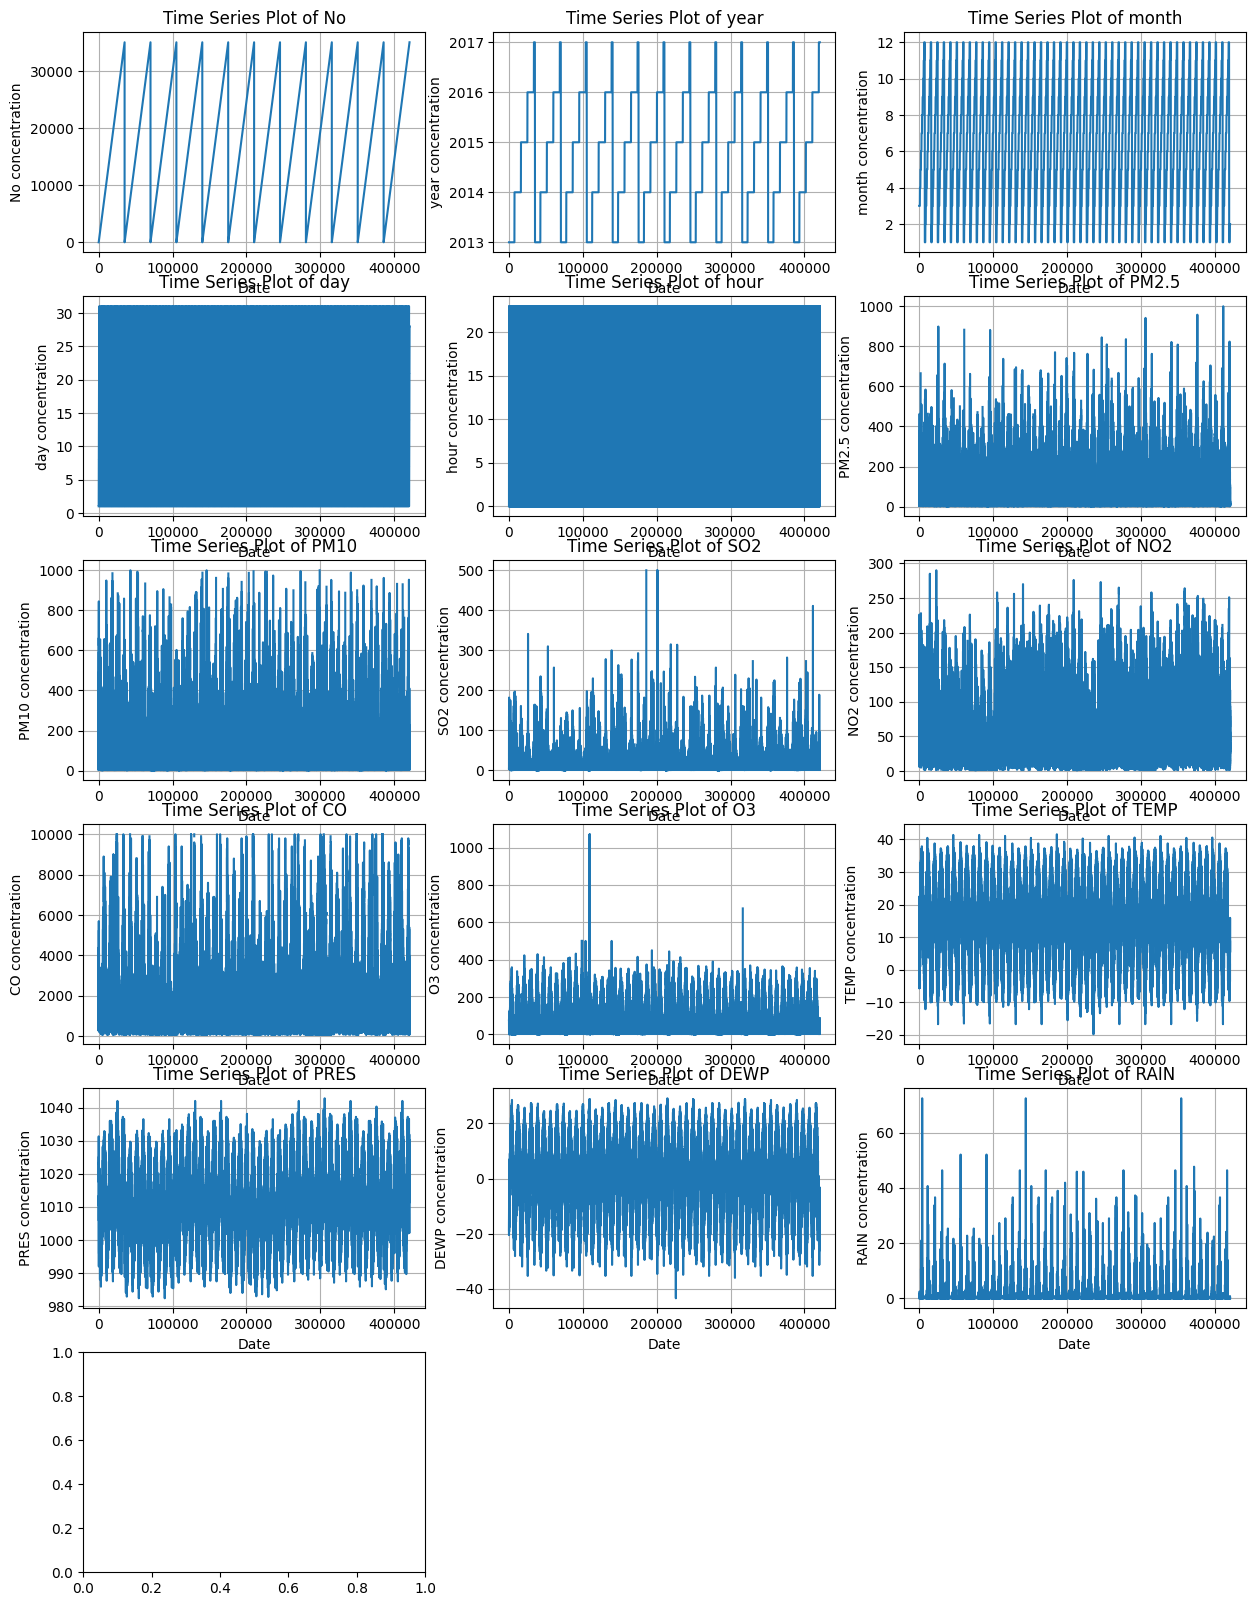

In [146]:
# Define figure size and number of columns for subplots
plt.figure(figsize=(15, 20))
num_cols = 3

# Iterate over each column except 'date' and 'station'
pollution_cols = [col for col in combined_df.columns if col not in ['date', 'station']]
num_plots = len(pollution_cols)

# Plot each pollution value
for i, col in enumerate(pollution_cols, start=1):
    plt.subplot((num_plots // num_cols) + 1, num_cols, i)
    combined_df[col].plot()
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Date')
    plt.ylabel(f'{col} concentration')
    plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah faktor cuaca pada masing-masing stasiun memiliki korelasi terhadap polusi udara?

### Pertanyaan 3: Apakah ada seasonality pada tingkat polusi di masing-masing stasiun?

## Conclusion

- Conclusion pertanyaan 1
- Conclusion pertanyaan 2